ReLU に関して深掘りして調べてみた。  
ReLU は DeepNeuralNetwork に使われる…という知識はあったのだけど、調べてみると関連する活性関数が沢山あった。


### ReLU

これは分かりやすい

In [1]:
import numpy as np


def relu_func(x):
    return np.where(x <= 0, 0, x)

### Leaky ReLU

こちらもわかりやすい、というかこれも前回実装してる

In [2]:
alpha = 0.01

def leaky_relu_func(x):
    return np.where(x <= 0, alpha * x, x)


### Parametric ReLU

Leaky ReLU のアルファ値が学習によって動的に変わる。

$$
  \alpha \geq 0 \\
  f(\alpha, x) = \left\{
      \begin{array}{cc}
        \alpha x & x \leq 0 \\
        x      & x > 0
      \end{array}
    \right.
$$

つってもこれは単純な関数でもないので、しれっとは書けないか…

In [4]:
def prelu_func(x, alpha = 1.0):
    return np.where(x <= 0, alpha * x, x)

### ELU

ELU（Exponential Linear Unit）というらしい。  
指数的 LU というだけあり、以下の様な仕様らしい

$$
  f(x) = \left\{
      \begin{array}{cc}
        \alpha(e^x - 1) & x \leq 0 \\
        x      & x > 0
      \end{array}
    \right.
$$

In [5]:
def elu_func(x, alpha = 1.0):
    return np.where(x <= 0, alpha * (np.exp(x) - 1), x)

### SELU

Scaled Exponential Linear Unit というらしい。  
2017 年の論文で出てきたかなり新しい奴だそうだ。

$$
  f(x) = \lambda \left\{
      \begin{array}{cc}
        \alpha (e^x - 1) & x \leq 0 \\
        x                & x > 0
      \end{array}
    \right.
$$

導関数の形状は

$$
  f'(x) = \lambda \left\{
      \begin{array}{cc}
        \alpha e^x & x \leq 0 \\
        1          & x > 0
      \end{array}
    \right.
$$

In [6]:
SCALE = 1.0507
ALPHA = 1.6732

def selu_func(x, scale=SCALE, alpha=ALPHA):
  return scale * np.where(x <= 0, alpha * (np.exp(x) - 1), x)

とここまで紹介した段階で、どんな特性があるのかグラフにしてみる。

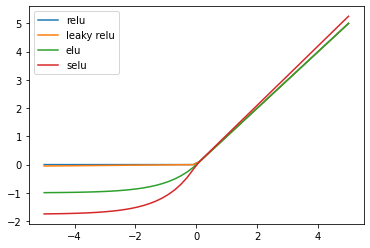

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5, 5)

plt.plot(x, relu_func(x), label='relu')
plt.plot(x, leaky_relu_func(x), label='leaky relu')
plt.plot(x, elu_func(x), label='elu')
plt.plot(x, selu_func(x), label='selu')
plt.legend()
plt.show()